# Garmin Data

Problem: The user has encountered difficulty in surpassing their personal record (PR) for a marathon since June 2022. To address this issue, the focus was placed on analyzing the average monthly distance covered to discern any discernible patterns in distance and speed. Additionally, an examination of the user's heart rate data was conducted to ascertain potential correlations with distance metrics. It is noteworthy that the data analysis was segmented into three categories: distances covered without races, distances covered with races, and distances covered exclusively during races. This segmentation was intended to facilitate a comprehensive comparison between different scenarios. Furthermore, the average pace was scrutinized, and a scatter plot was generated to visualize the variability in pace over time. The PR was last achieved in June 2022, and subsequent attempts to break the three-hour mark have been unsuccessful.

Task: The objective is to clean a CSV file containing data from previous months/years to identify the user's activities leading up to the PR and determine the factors contributing to the subsequent inability to surpass it.

Solution: Upon analysis, it was observed that the key disparity between the successful PR attempt and subsequent efforts was the volume of running undertaken prior to races. Since the PR achievement, there has been a notable decrease in the user's running activity. Subsequent discussions with the user revealed that they experienced two instances of hip injury, which adversely impacted their running volume. This decline in running activity is identified as a significant contributing factor to the inability to surpass the three-hour mark in subsequent marathon attempts.

## Average Distance by Month

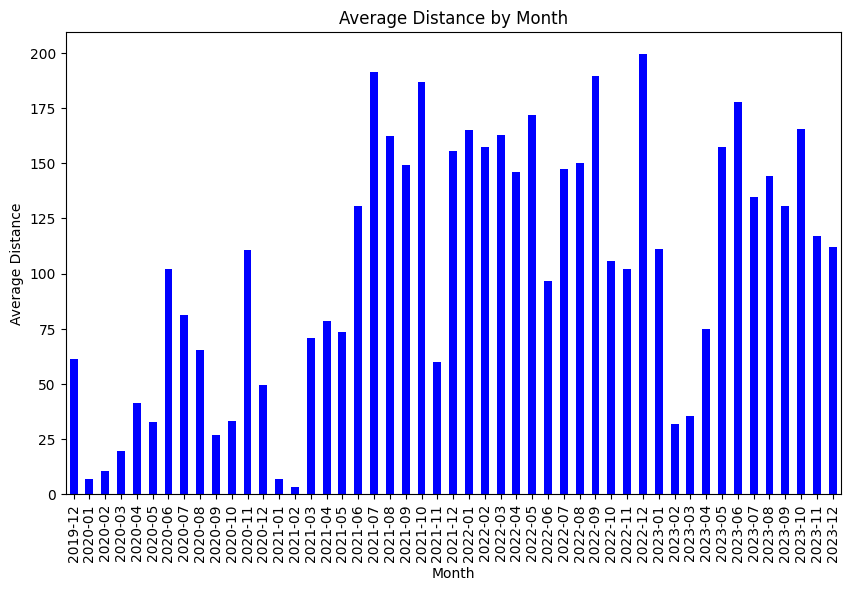

,Activity Type,Date,Title,Distance,Time,Avg HR,Max HR,Best Pace
0,Running,2023-12-18,Troutman Running,7.16,00:59:03,142,151,4:48
1,Treadmill Running,2023-12-17,Treadmill Running,11.83,01:46:03,132,141,8:00
2,Treadmill Running,2023-12-16,Zone 2 Run,6.75,01:00:15,134,143,8:03
3,Running,2023-12-16,Zone 2 Run,6.94,01:01:26,141,151,4:40
4,Treadmill Running,2023-12-15,Treadmill Running,0.60,00:28:14,102,138,6:58
...,...,...,...,...,...,...,...,...
944,Running,2019-12-21,Mecklenburg County Running,3.25,00:26:51,163,180,5:19
945,Running,2019-12-18,Mooresville Running,3.10,00:24:48,160,171,6:53
946,Running,2019-12-16,Mooresville Running,1.01,00:07:35.9,154,166,7:00
947,Running,2019-12-15,Mooresville Running,3.10,00:25:28,158,169,7:16


In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/work/Garmin-Data.csv")

df.drop(columns=['Favorite', 'Calories', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace'], inplace=True)
df.drop(columns=['Total Ascent', 'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation'], inplace=True)
df.drop(columns=['Avg Ground Contact Time', 'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)', 'Avg Power'], inplace=True)
df.drop(columns=['Training Stress Score®', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps'], inplace=True)
df.drop(columns=['Max Power', 'Dive Time', 'Min Temp', 'Surface Interval', 'Decompression', 'Best Lap Time'], inplace=True)
df.drop(columns=['Number of Laps', 'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time'], inplace=True)
df.drop(columns=['Elapsed Time', 'Min Elevation', 'Max Elevation'], inplace=True)

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')

df["Distance"] = pd.to_numeric(df["Distance"], errors='coerce')

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')


monthly_avg_pace = df.groupby(df["Date"].dt.to_period("M"))["Distance"].sum()


plt.figure(figsize=(10, 6))
monthly_avg_pace.plot(kind="bar", color="blue")
plt.title("Average Distance by Month")
plt.xlabel("Month")
plt.ylabel("Average Distance")
plt.show()

df


## Average Distance By Month Without Any Races

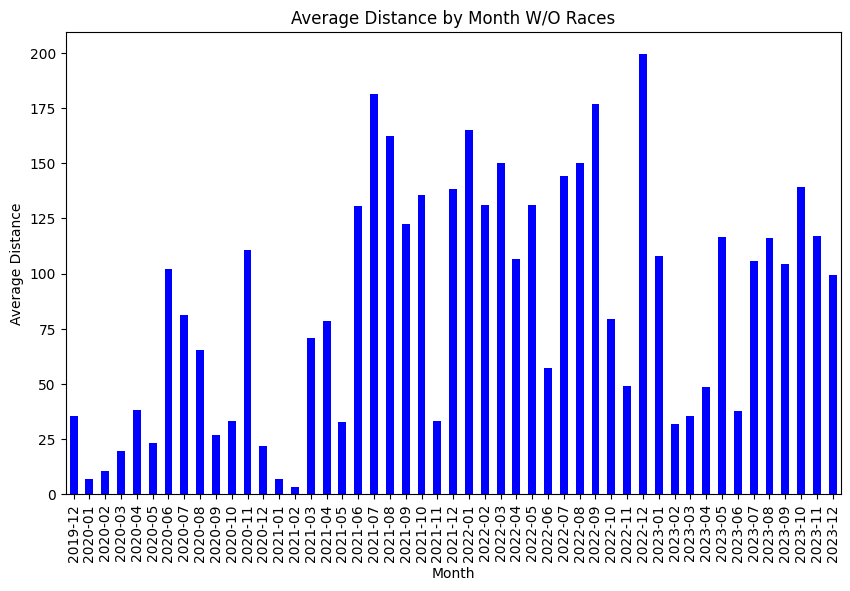

,Activity Type,Date,Title,Distance,Time,Avg HR,Max HR,Best Pace
0,Running,2023-12-18,Troutman Running,7.16,00:59:03,142,151,4:48
1,Treadmill Running,2023-12-17,Treadmill Running,11.83,01:46:03,132,141,8:00
2,Treadmill Running,2023-12-16,Zone 2 Run,6.75,01:00:15,134,143,8:03
3,Running,2023-12-16,Zone 2 Run,6.94,01:01:26,141,151,4:40
4,Treadmill Running,2023-12-15,Treadmill Running,0.60,00:28:14,102,138,6:58
...,...,...,...,...,...,...,...,...
943,Running,2019-12-22,Mooresville Running,6.20,00:58:15,150,161,7:07
944,Running,2019-12-21,Mecklenburg County Running,3.25,00:26:51,163,180,5:19
945,Running,2019-12-18,Mooresville Running,3.10,00:24:48,160,171,6:53
946,Running,2019-12-16,Mooresville Running,1.01,00:07:35.9,154,166,7:00


In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv("/work/Garmin-Data.csv")

df.drop(columns=['Favorite', 'Calories', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace'], inplace=True)
df.drop(columns=['Total Ascent', 'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation'], inplace=True)
df.drop(columns=['Avg Ground Contact Time', 'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)', 'Avg Power'], inplace=True)
df.drop(columns=['Training Stress Score®', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps'], inplace=True)
df.drop(columns=['Max Power', 'Dive Time', 'Min Temp', 'Surface Interval', 'Decompression', 'Best Lap Time'], inplace=True)
df.drop(columns=['Number of Laps', 'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time'], inplace=True)
df.drop(columns=['Elapsed Time', 'Min Elevation', 'Max Elevation'], inplace=True)

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')

df["Distance"] = pd.to_numeric(df["Distance"], errors='coerce')

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

keywords_to_remove = ['Marathon', '5k', 'Race', 'Jim', 'Half']

mask = ~df['Title'].str.contains('|'.join(keywords_to_remove), case=False)
df = df[mask]


monthly_avg_pace = df.groupby(df["Date"].dt.to_period("M"))["Distance"].sum()


plt.figure(figsize=(10, 6))
monthly_avg_pace.plot(kind="bar", color="blue")
plt.title("Average Distance by Month W/O Races")
plt.xlabel("Month")
plt.ylabel("Average Distance")
plt.show()

df

## Average Distance by Month with Races

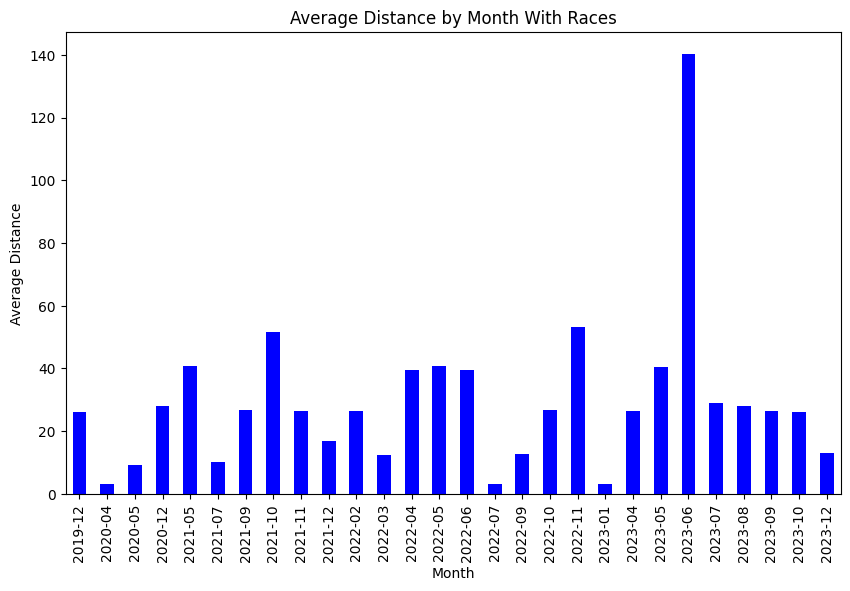

,Activity Type,Date,Title,Distance,Time,Avg HR,Max HR,Best Pace
11,Running,2023-12-09,Huntersville Half Marathon,13.01,01:29:11,168,177,5:34
44,Running,2023-10-08,Chicago - Chicago Marathon,26.13,03:01:08,157,165,3:45
51,Running,2023-09-24,Berlin - Berlin Marathon,26.42,03:03:46,158,163,4:57
74,Running,2023-08-29,2nd Half Yassos,3.23,00:28:54,143,164,5:09
75,Running,2023-08-29,First Half Yasso NBs,3.22,00:28:44,135,158,5:10
78,Running,2023-08-26,Yiasou Greek Festival 5k,3.13,00:20:14,164,170,5:49
91,Running,2023-08-12,4x7.5k. AFs,4.65,00:34:03,163,169,6:48
92,Running,2023-08-12,3x7.5k. YVs,4.65,00:33:40,159,164,6:34
93,Running,2023-08-12,2x7.5k PP3s.,4.66,00:33:10,160,162,5:27
94,Running,2023-08-12,1x 7.5k. AFs.,4.65,00:31:27,158,165,6:11


In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


df = pd.read_csv("/work/Garmin-Data.csv")

df.drop(columns=['Favorite', 'Calories', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Avg Pace'], inplace=True)
df.drop(columns=['Total Ascent', 'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation'], inplace=True)
df.drop(columns=['Avg Ground Contact Time', 'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)', 'Avg Power'], inplace=True)
df.drop(columns=['Training Stress Score®', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps'], inplace=True)
df.drop(columns=['Max Power', 'Dive Time', 'Min Temp', 'Surface Interval', 'Decompression', 'Best Lap Time'], inplace=True)
df.drop(columns=['Number of Laps', 'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time'], inplace=True)
df.drop(columns=['Elapsed Time', 'Min Elevation', 'Max Elevation'], inplace=True)

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')

df["Distance"] = pd.to_numeric(df["Distance"], errors='coerce')

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

keywords_to_remove = ['Marathon', '5k', 'Race', 'Jim', 'Half']

mask = df['Title'].str.contains('|'.join(keywords_to_remove), case=False)
df = df[mask]


monthly_avg_pace = df.groupby(df["Date"].dt.to_period("M"))["Distance"].sum()


plt.figure(figsize=(10, 6))
monthly_avg_pace.plot(kind="bar", color="blue")
plt.title("Average Distance by Month With Races")
plt.xlabel("Month")
plt.ylabel("Average Distance")
plt.show()

df

### 

## Average Heart Rate By Distance

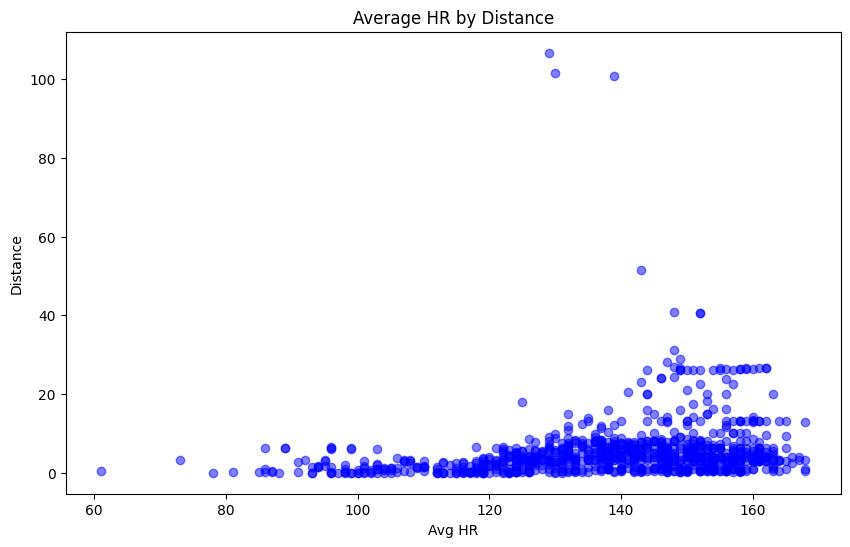

,Activity Type,Date,Title,Distance,Time,Avg HR,Max HR,Avg Pace
0,Running,2023-12-18 13:59:55,Troutman Running,7.16,00:59:03,142.0,151,8:15
1,Treadmill Running,2023-12-17 14:47:20,Treadmill Running,11.83,01:46:03,132.0,141,8:58
2,Treadmill Running,2023-12-16 17:04:36,Zone 2 Run,6.75,01:00:15,134.0,143,8:56
3,Running,2023-12-16 10:53:40,Zone 2 Run,6.94,01:01:26,141.0,151,8:51
4,Treadmill Running,2023-12-15 06:20:21,Treadmill Running,0.60,00:28:14,102.0,138,46:49
...,...,...,...,...,...,...,...,...
944,Running,2019-12-21 11:14:53,Mecklenburg County Running,3.25,00:26:51,163.0,180,8:16
945,Running,2019-12-18 15:41:23,Mooresville Running,3.10,00:24:48,160.0,171,8:00
946,Running,2019-12-16 14:49:53,Mooresville Running,1.01,00:07:35.9,154.0,166,7:32
947,Running,2019-12-15 10:15:10,Mooresville Running,3.10,00:25:28,158.0,169,8:12


In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/work/Garmin-Data.csv")

df.drop(columns=['Favorite', 'Calories', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Best Pace'], inplace=True)
df.drop(columns=['Total Ascent', 'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation'], inplace=True)
df.drop(columns=['Avg Ground Contact Time', 'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)', 'Avg Power'], inplace=True)
df.drop(columns=['Training Stress Score®', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps'], inplace=True)
df.drop(columns=['Max Power', 'Dive Time', 'Min Temp', 'Surface Interval', 'Decompression', 'Best Lap Time'], inplace=True)
df.drop(columns=['Number of Laps', 'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time'], inplace=True)
df.drop(columns=['Elapsed Time', 'Min Elevation', 'Max Elevation'], inplace=True)


rows_to_drop = [37, 69, 156, 170, 174, 181, 182, 793, 940]
df = df.drop(index=rows_to_drop)

df["Avg HR"] = pd.to_numeric(df["Avg HR"], errors='coerce')
df = df.dropna(subset=["Avg HR"])



plt.figure(figsize=(10, 6))
plt.scatter(df["Avg HR"], df["Distance"], color="blue", alpha=0.5)
plt.title("Average HR by Distance")
plt.xlabel("Avg HR")
plt.ylabel("Distance")
plt.show()

df


## Average Heart Rate by Month Just Marathons

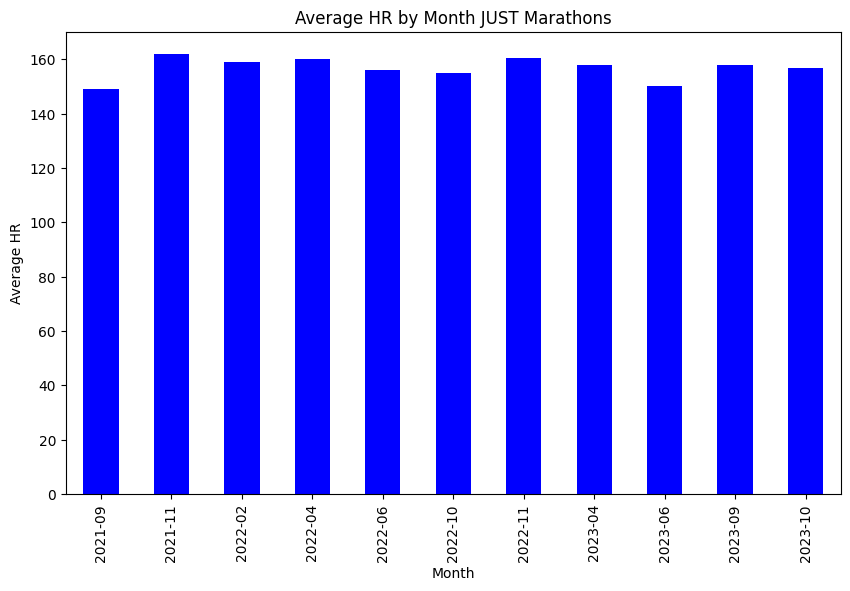

,Activity Type,Date,Title,Distance,Time,Avg HR,Max HR,Avg Pace
44,Running,2023-10-08,Chicago - Chicago Marathon,26.13,03:01:08,157,165,6:56
51,Running,2023-09-24,Berlin - Berlin Marathon,26.42,03:03:46,158,163,6:57
122,Running,2023-06-21,Native Jackal Trail Marathon #5,26.74,04:25:37,148,162,9:56
123,Running,2023-06-20,Dragonfly Jackal Marathon #4,26.10,03:19:01,152,161,7:37
124,Running,2023-06-19,Asphalt Jackal Marathon #3,26.16,03:23:16,149,163,7:46
125,Running,2023-06-18,Backass Jackal Trail Marathon #2,24.10,03:55:47,146,159,9:47
126,Running,2023-06-17,Trail Jackal Marathon #1,23.89,03:53:14,156,174,9:46
169,Running,2023-04-17,Hopkinton - Boston Marathon,26.37,03:25:23,158,170,7:47
262,Running,2022-11-12,Charlotte - Charlotte Marathon,26.53,03:13:01,159,173,7:17
265,Running,2022-11-06,New York - New York City Marathon,26.56,03:36:04,162,173,8:08


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/work/Garmin-Data.csv")

df.drop(columns=['Favorite', 'Calories', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Best Pace'], inplace=True)
df.drop(columns=['Total Ascent', 'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation'], inplace=True)
df.drop(columns=['Avg Ground Contact Time', 'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)', 'Avg Power'], inplace=True)
df.drop(columns=['Training Stress Score®', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps'], inplace=True)
df.drop(columns=['Max Power', 'Dive Time', 'Min Temp', 'Surface Interval', 'Decompression', 'Best Lap Time'], inplace=True)
df.drop(columns=['Number of Laps', 'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time'], inplace=True)
df.drop(columns=['Elapsed Time', 'Min Elevation', 'Max Elevation'], inplace=True)

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

rows_to_drop = [37, 69, 156, 170, 174, 181, 182, 793, 940]
df = df.drop(index=rows_to_drop)

keywords_to_include = ['Marathon']

mask = df['Title'].str.contains('|'.join(keywords_to_include), case=False)
df = df[mask]

keywords_to_remove = ['half']

mask = ~df['Title'].str.contains('|'.join(keywords_to_remove), case=False)
df = df[mask]

df["Avg HR"] = pd.to_numeric(df["Avg HR"], errors='coerce')

# Drop rows with NaN values in "Avg HR" column
df = df.dropna(subset=["Avg HR"])

monthly_avg_hr = df.groupby(df["Date"].dt.to_period("M"))["Avg HR"].mean()


plt.figure(figsize=(10, 6))
monthly_avg_hr.plot(kind="bar", color="blue")
plt.title("Average HR by Month JUST Marathons")
plt.xlabel("Month")
plt.ylabel("Average HR")
plt.show()

df

#if u didn't finish the mile, it calculates it to finish out the mile for ur pace... atleast i think...


## Average Pace by Month

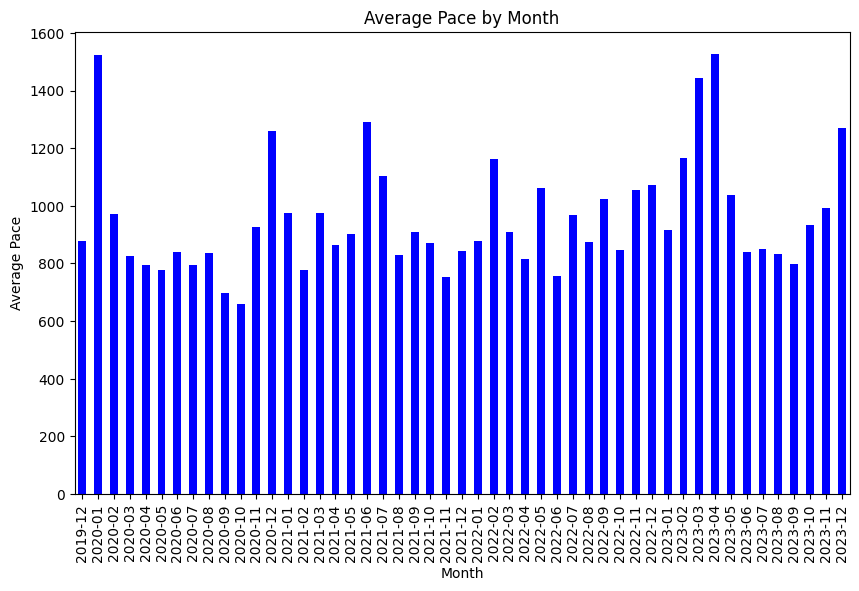

,Activity Type,Date,Title,Distance,Time,Avg HR,Max HR,Avg Pace
0,Running,2023-12-18,Troutman Running,7.16,00:59:03,142,151,815
1,Treadmill Running,2023-12-17,Treadmill Running,11.83,01:46:03,132,141,858
2,Treadmill Running,2023-12-16,Zone 2 Run,6.75,01:00:15,134,143,856
3,Running,2023-12-16,Zone 2 Run,6.94,01:01:26,141,151,851
4,Treadmill Running,2023-12-15,Treadmill Running,0.60,00:28:14,102,138,4649
...,...,...,...,...,...,...,...,...
944,Running,2019-12-21,Mecklenburg County Running,3.25,00:26:51,163,180,816
945,Running,2019-12-18,Mooresville Running,3.10,00:24:48,160,171,800
946,Running,2019-12-16,Mooresville Running,1.01,00:07:35.9,154,166,732
947,Running,2019-12-15,Mooresville Running,3.10,00:25:28,158,169,812


In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/work/Garmin-Data.csv")

df.drop(columns=['Favorite', 'Calories', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Best Pace'], inplace=True)
df.drop(columns=['Total Ascent', 'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation'], inplace=True)
df.drop(columns=['Avg Ground Contact Time', 'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)', 'Avg Power'], inplace=True)
df.drop(columns=['Training Stress Score®', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps'], inplace=True)
df.drop(columns=['Max Power', 'Dive Time', 'Min Temp', 'Surface Interval', 'Decompression', 'Best Lap Time'], inplace=True)
df.drop(columns=['Number of Laps', 'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time'], inplace=True)
df.drop(columns=['Elapsed Time', 'Min Elevation', 'Max Elevation'], inplace=True)

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

rows_to_drop = [37, 69, 156, 170, 174, 181, 182, 793, 940]
df = df.drop(index=rows_to_drop)

df["Avg Pace"] = df["Avg Pace"].str.replace(":", "")
df = df.astype({"Avg Pace":int})

monthly_avg_pace = df.groupby(df["Date"].dt.to_period("M"))["Avg Pace"].mean()


plt.figure(figsize=(10, 6))
monthly_avg_pace.plot(kind="bar", color="blue")
plt.title("Average Pace by Month")
plt.xlabel("Month")
plt.ylabel("Average Pace")
plt.show()

df


## Average Pace By Month & Distance with Races Included

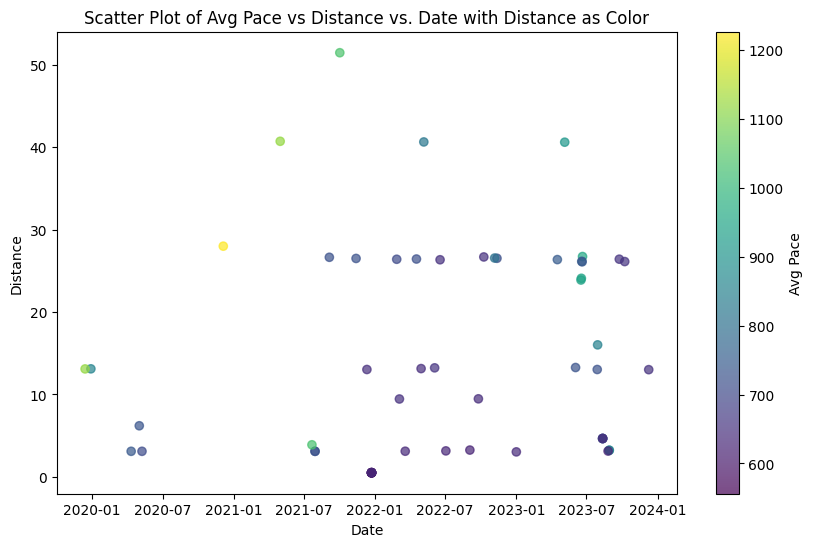

In [7]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/work/Garmin-Data.csv")

df.drop(columns=['Favorite', 'Calories', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Best Pace'], inplace=True)
df.drop(columns=['Total Ascent', 'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation'], inplace=True)
df.drop(columns=['Avg Ground Contact Time', 'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)', 'Avg Power'], inplace=True)
df.drop(columns=['Training Stress Score®', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps'], inplace=True)
df.drop(columns=['Max Power', 'Dive Time', 'Min Temp', 'Surface Interval', 'Decompression', 'Best Lap Time'], inplace=True)
df.drop(columns=['Number of Laps', 'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time'], inplace=True)
df.drop(columns=['Elapsed Time', 'Min Elevation', 'Max Elevation'], inplace=True)

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

rows_to_drop = [37, 69, 156, 170, 174, 181, 182, 793, 940]
df = df.drop(index=rows_to_drop)

keywords_to_include = ['Marathon', '5k', 'Race', 'Jim', 'Half']

mask = df['Title'].str.contains('|'.join(keywords_to_include), case=False)
df = df[mask]

df["Avg Pace"] = df["Avg Pace"].str.replace(":", "")
df = df.astype({"Avg Pace":int})

monthly_avg_pace = df.groupby(df["Date"].dt.to_period("M"))["Avg Pace"].mean()


plt.figure(figsize=(10, 6))
plt.scatter(df["Date"], df["Distance"], c=df["Avg Pace"], cmap='viridis', alpha=0.7)

# Add labels and a colorbar
plt.title("Scatter Plot of Avg Pace vs Distance vs. Date with Distance as Color")
plt.xlabel("Date")
plt.ylabel("Distance")
plt.colorbar(label="Avg Pace")

plt.show()

#if u didn't finish the mile, it calculates it to finish out the mile for ur pace... atleast i think...


## Average Pace By Month Just the Marathons

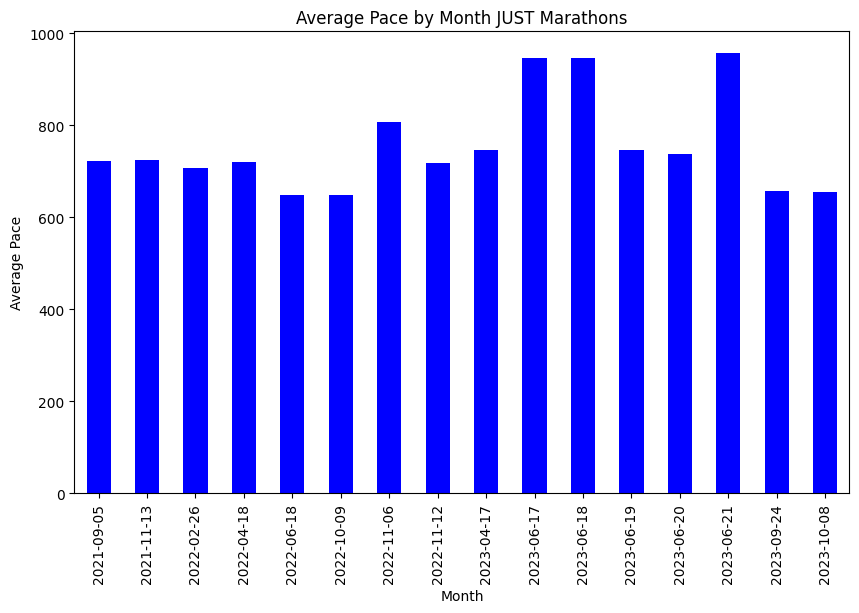

,Activity Type,Date,Title,Distance,Time,Avg HR,Max HR,Avg Pace
44,Running,2023-10-08,Chicago - Chicago Marathon,26.13,03:01:08,157,165,656
51,Running,2023-09-24,Berlin - Berlin Marathon,26.42,03:03:46,158,163,657
122,Running,2023-06-21,Native Jackal Trail Marathon #5,26.74,04:25:37,148,162,956
123,Running,2023-06-20,Dragonfly Jackal Marathon #4,26.10,03:19:01,152,161,737
124,Running,2023-06-19,Asphalt Jackal Marathon #3,26.16,03:23:16,149,163,746
125,Running,2023-06-18,Backass Jackal Trail Marathon #2,24.10,03:55:47,146,159,947
126,Running,2023-06-17,Trail Jackal Marathon #1,23.89,03:53:14,156,174,946
169,Running,2023-04-17,Hopkinton - Boston Marathon,26.37,03:25:23,158,170,747
262,Running,2022-11-12,Charlotte - Charlotte Marathon,26.53,03:13:01,159,173,717
265,Running,2022-11-06,New York - New York City Marathon,26.56,03:36:04,162,173,808


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/work/Garmin-Data.csv")

df.drop(columns=['Favorite', 'Calories', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Best Pace'], inplace=True)
df.drop(columns=['Total Ascent', 'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation'], inplace=True)
df.drop(columns=['Avg Ground Contact Time', 'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)', 'Avg Power'], inplace=True)
df.drop(columns=['Training Stress Score®', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps'], inplace=True)
df.drop(columns=['Max Power', 'Dive Time', 'Min Temp', 'Surface Interval', 'Decompression', 'Best Lap Time'], inplace=True)
df.drop(columns=['Number of Laps', 'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time'], inplace=True)
df.drop(columns=['Elapsed Time', 'Min Elevation', 'Max Elevation'], inplace=True)

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

rows_to_drop = [37, 69, 156, 170, 174, 181, 182, 793, 940]
df = df.drop(index=rows_to_drop)

keywords_to_include = ['Marathon']

mask = df['Title'].str.contains('|'.join(keywords_to_include), case=False)
df = df[mask]

keywords_to_remove = ['half']

mask = ~df['Title'].str.contains('|'.join(keywords_to_remove), case=False)
df = df[mask]

df["Avg Pace"] = df["Avg Pace"].str.replace(":", "")
df = df.astype({"Avg Pace":int})

monthly_avg_pace = df.groupby(df["Date"].dt.to_period("D"))["Avg Pace"].mean()


plt.figure(figsize=(10, 6))
monthly_avg_pace.plot(kind="bar", color="blue")
plt.title("Average Pace by Month JUST Marathons")
plt.xlabel("Month")
plt.ylabel("Average Pace")
plt.show()

df

## Average Pace By Month (Scatter Plot)

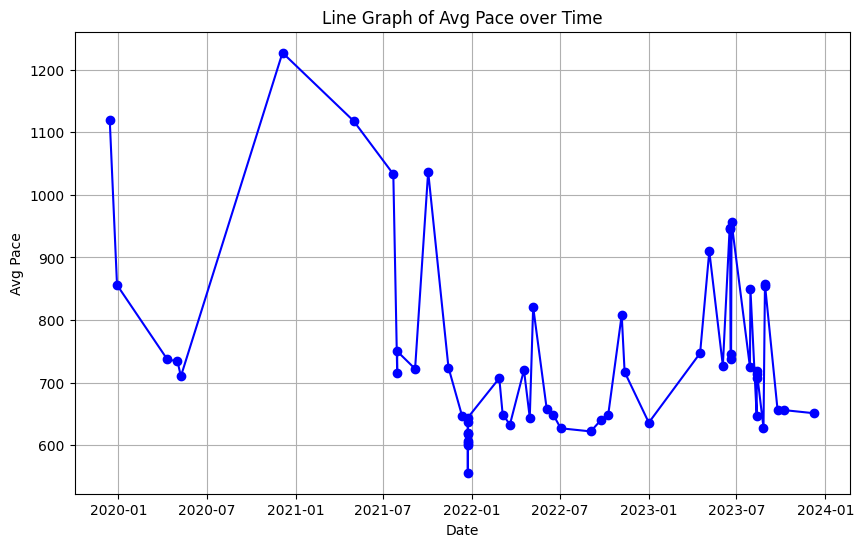

,Activity Type,Date,Title,Distance,Time,Avg HR,Max HR,Avg Pace
11,Running,2023-12-09,Huntersville Half Marathon,13.01,01:29:11,168,177,651
44,Running,2023-10-08,Chicago - Chicago Marathon,26.13,03:01:08,157,165,656
51,Running,2023-09-24,Berlin - Berlin Marathon,26.42,03:03:46,158,163,657
74,Running,2023-08-29,2nd Half Yassos,3.23,00:28:54,143,164,857
75,Running,2023-08-29,First Half Yasso NBs,3.22,00:28:44,135,158,855
78,Running,2023-08-26,Yiasou Greek Festival 5k,3.13,00:20:14,164,170,628
91,Running,2023-08-12,4x7.5k. AFs,4.65,00:34:03,163,169,719
92,Running,2023-08-12,3x7.5k. YVs,4.65,00:33:40,159,164,714
93,Running,2023-08-12,2x7.5k PP3s.,4.66,00:33:10,160,162,707
94,Running,2023-08-12,1x 7.5k. AFs.,4.65,00:31:27,158,165,646


In [9]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/work/Garmin-Data.csv")

df.drop(columns=['Favorite', 'Calories', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Best Pace'], inplace=True)
df.drop(columns=['Total Ascent', 'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation'], inplace=True)
df.drop(columns=['Avg Ground Contact Time', 'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)', 'Avg Power'], inplace=True)
df.drop(columns=['Training Stress Score®', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps'], inplace=True)
df.drop(columns=['Max Power', 'Dive Time', 'Min Temp', 'Surface Interval', 'Decompression', 'Best Lap Time'], inplace=True)
df.drop(columns=['Number of Laps', 'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time'], inplace=True)
df.drop(columns=['Elapsed Time', 'Min Elevation', 'Max Elevation'], inplace=True)

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

rows_to_drop = [37, 69, 156, 170, 174, 181, 182, 793, 940]
df = df.drop(index=rows_to_drop)

keywords_to_include = ['Marathon', '5k', 'Race', 'Jim', 'Half']

mask = df['Title'].str.contains('|'.join(keywords_to_include), case=False)
df = df[mask]

df["Avg Pace"] = df["Avg Pace"].str.replace(":", "")
df = df.astype({"Avg Pace":int})

monthly_avg_pace = df.groupby(df["Date"].dt.to_period("M"))["Avg Pace"].mean()


plt.figure(figsize=(10, 6))
plt.plot(df["Date"], df["Avg Pace"], marker='o', linestyle='-', color='blue')

# Add labels
plt.title("Line Graph of Avg Pace over Time")
plt.xlabel("Date")
plt.ylabel("Avg Pace")

plt.grid(True)
plt.show()

df

## Average Pace By Months Without Races

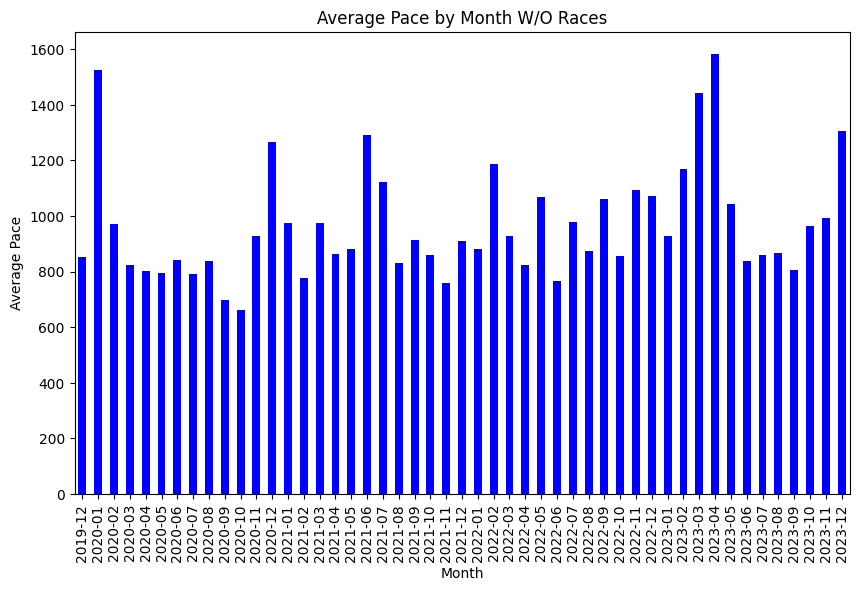

,Activity Type,Date,Title,Distance,Time,Avg HR,Max HR,Avg Pace
0,Running,2023-12-18,Troutman Running,7.16,00:59:03,142,151,815
1,Treadmill Running,2023-12-17,Treadmill Running,11.83,01:46:03,132,141,858
2,Treadmill Running,2023-12-16,Zone 2 Run,6.75,01:00:15,134,143,856
3,Running,2023-12-16,Zone 2 Run,6.94,01:01:26,141,151,851
4,Treadmill Running,2023-12-15,Treadmill Running,0.60,00:28:14,102,138,4649
...,...,...,...,...,...,...,...,...
943,Running,2019-12-22,Mooresville Running,6.20,00:58:15,150,161,924
944,Running,2019-12-21,Mecklenburg County Running,3.25,00:26:51,163,180,816
945,Running,2019-12-18,Mooresville Running,3.10,00:24:48,160,171,800
946,Running,2019-12-16,Mooresville Running,1.01,00:07:35.9,154,166,732


In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/work/Garmin-Data.csv")

df.drop(columns=['Favorite', 'Calories', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Best Pace'], inplace=True)
df.drop(columns=['Total Ascent', 'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation'], inplace=True)
df.drop(columns=['Avg Ground Contact Time', 'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)', 'Avg Power'], inplace=True)
df.drop(columns=['Training Stress Score®', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps'], inplace=True)
df.drop(columns=['Max Power', 'Dive Time', 'Min Temp', 'Surface Interval', 'Decompression', 'Best Lap Time'], inplace=True)
df.drop(columns=['Number of Laps', 'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time'], inplace=True)
df.drop(columns=['Elapsed Time', 'Min Elevation', 'Max Elevation'], inplace=True)

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

rows_to_drop = [37, 69, 156, 170, 174, 181, 182, 793, 940]
df = df.drop(index=rows_to_drop)

keywords_to_remove = ['Marathon', '5k', 'Race', 'Jim', 'Half']

mask = ~df['Title'].str.contains('|'.join(keywords_to_remove), case=False)
df = df[mask]


df["Avg Pace"] = df["Avg Pace"].str.replace(":", "")
df = df.astype({"Avg Pace":int})

monthly_avg_pace = df.groupby(df["Date"].dt.to_period("M"))["Avg Pace"].mean()


plt.figure(figsize=(10, 6))
monthly_avg_pace.plot(kind="bar", color="blue")
plt.title("Average Pace by Month W/O Races")
plt.xlabel("Month")
plt.ylabel("Average Pace")
plt.show()

df

## Average Pace By Month With Races

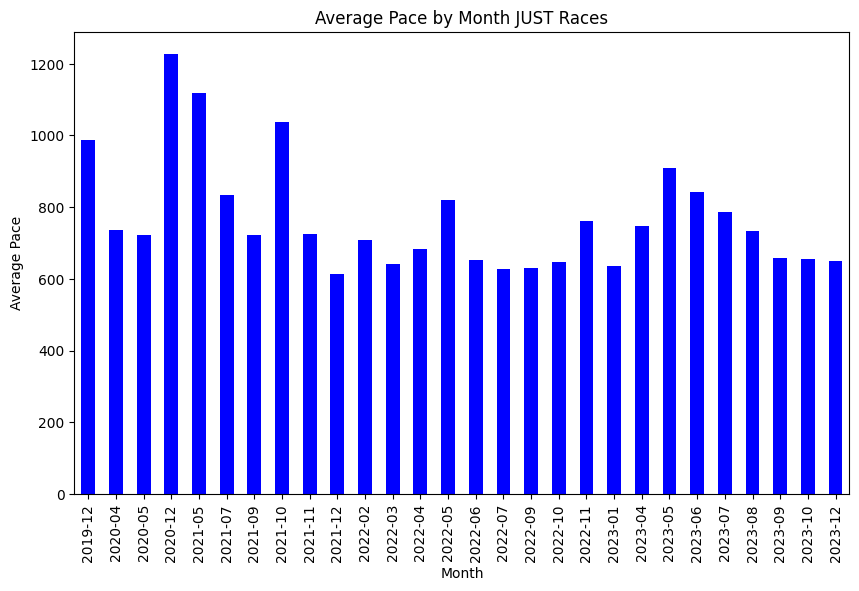

,Activity Type,Date,Title,Distance,Time,Avg HR,Max HR,Avg Pace
11,Running,2023-12-09,Huntersville Half Marathon,13.01,01:29:11,168,177,651
44,Running,2023-10-08,Chicago - Chicago Marathon,26.13,03:01:08,157,165,656
51,Running,2023-09-24,Berlin - Berlin Marathon,26.42,03:03:46,158,163,657
74,Running,2023-08-29,2nd Half Yassos,3.23,00:28:54,143,164,857
75,Running,2023-08-29,First Half Yasso NBs,3.22,00:28:44,135,158,855
78,Running,2023-08-26,Yiasou Greek Festival 5k,3.13,00:20:14,164,170,628
91,Running,2023-08-12,4x7.5k. AFs,4.65,00:34:03,163,169,719
92,Running,2023-08-12,3x7.5k. YVs,4.65,00:33:40,159,164,714
93,Running,2023-08-12,2x7.5k PP3s.,4.66,00:33:10,160,162,707
94,Running,2023-08-12,1x 7.5k. AFs.,4.65,00:31:27,158,165,646


In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("/work/Garmin-Data.csv")

df.drop(columns=['Favorite', 'Calories', 'Aerobic TE', 'Avg Run Cadence', 'Max Run Cadence', 'Best Pace'], inplace=True)
df.drop(columns=['Total Ascent', 'Total Descent', 'Avg Stride Length', 'Avg Vertical Ratio', 'Avg Vertical Oscillation'], inplace=True)
df.drop(columns=['Avg Ground Contact Time', 'Avg GCT Balance', 'Avg GAP', 'Normalized Power® (NP®)', 'Avg Power'], inplace=True)
df.drop(columns=['Training Stress Score®', 'Grit', 'Flow', 'Avg. Swolf', 'Avg Stroke Rate', 'Total Reps'], inplace=True)
df.drop(columns=['Max Power', 'Dive Time', 'Min Temp', 'Surface Interval', 'Decompression', 'Best Lap Time'], inplace=True)
df.drop(columns=['Number of Laps', 'Max Temp', 'Avg Resp', 'Min Resp', 'Max Resp', 'Moving Time'], inplace=True)
df.drop(columns=['Elapsed Time', 'Min Elevation', 'Max Elevation'], inplace=True)

df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d %H:%M:%S').dt.strftime('%Y-%m-%d')
df["Date"] = pd.to_datetime(df["Date"], format='%Y-%m-%d')

rows_to_drop = [37, 69, 156, 170, 174, 181, 182, 793, 940]
df = df.drop(index=rows_to_drop)

keywords_to_include = ['Marathon', '5k', 'Race', 'Jim', 'Half']

mask = df['Title'].str.contains('|'.join(keywords_to_include), case=False)
df = df[mask]

df["Avg Pace"] = df["Avg Pace"].str.replace(":", "")
df = df.astype({"Avg Pace":int})

monthly_avg_pace = df.groupby(df["Date"].dt.to_period("M"))["Avg Pace"].mean()


plt.figure(figsize=(10, 6))
monthly_avg_pace.plot(kind="bar", color="blue")
plt.title("Average Pace by Month JUST Races")
plt.xlabel("Month")
plt.ylabel("Average Pace")
plt.show()

df

Thank you for reading. - Alli

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=e6dbf4ad-c6fb-4a3a-ba84-c389c1d92e81' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>